Alex Beyer
PS4.5 - NN Search Code



In [17]:
#library imports
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#environment setup w/rng seeding for consistency
sns.set_context('poster')
np.random.seed(1)
torch.manual_seed(3)

In [19]:
#extensible NN definition - python throws a fit if I have a class be an argument for __init__ in another class so I'm explicitly coding in the different activation functions :(
class extNetSigmoid(nn.Module):
    #arbitrarily deep/wide pytorch NN generator -- sigmoid activator
    #inits 1 layer deep, 2 neuron wide net by default 
    def __init__(self, numHide = 1, numNodes = 2):
        
        super(extNetSigmoid, self).__init__()
        
        #store inputs as class properties
        self.numHide = numHide
        self.numNodes = numNodes

        #hardcode activator to avoid errors from passing classes to classes (I don't know but at least this works)
        self.activation = nn.Sigmoid()  

        #make a list of layers to iterate over
        self.layers = nn.ModuleList()
        #define the first layer to be of 1->numNodes depth
        self.layers.append(nn.Linear(1,self.numNodes))
        #define numHide hidden layers to be of numNodes->numNodes depth
        for i in range(self.numHide):
            self.layers.append(nn.Linear(self.numNodes,self.numNodes))
        #define output layer to be of numNodes->1 depth
        self.layers.append(nn.Linear(self.numNodes,1))

        #our model is not going to run into numerical issues, disable float support by enabling double precision support
        self.double()

    def forward(self, x):  
        #step into loop
        out = x
        for layer in self.layers: #iterate over all layers in the list from before
            out = layer(out)
            #dont apply activaiton function to first or last layer
            if layer.out_features != 1 and layer.in_features != 1:
                out = self.activation(out)
        return out

    #model reset function
    def reset(self):
        for layer in self.layers:
            layer.reset_parameters()

In [20]:
class extNetRELU(nn.Module):
    #arbitrarily deep/wide pytorch NN generator -- sigmoid activator
    #inits 1 layer deep, 2 neuron wide net by default 
    def __init__(self, numHide = 1, numNodes = 2):
        
        super(extNetRELU, self).__init__()
        
        #store inputs as class properties
        self.numHide = numHide
        self.numNodes = numNodes

        #hardcode activator to avoid errors from passing classes to classes (I don't know but at least this works)
        self.activation = nn.ReLU()  

        #make a list of layers to iterate over
        self.layers = nn.ModuleList()
        #define the first layer to be of 1->numNodes depth
        self.layers.append(nn.Linear(1,self.numNodes))
        #define numHide hidden layers to be of numNodes->numNodes depth
        for i in range(self.numHide):
            self.layers.append(nn.Linear(self.numNodes,self.numNodes))
        #define output layer to be of numNodes->1 depth
        self.layers.append(nn.Linear(self.numNodes,1))

        #our model is not going to run into numerical issues, disable float support by enabling double precision support
        self.double()    
    # Forward pass builds the model prediction from the inputs
    def forward(self, x):  
        #step into loop
        out = x
        for layer in self.layers: #iterate over all layers in the list from before
            out = layer(out)
            #dont apply activaiton function to first or last layer
            if layer.out_features != 1 and layer.in_features != 1:
                out = self.activation(out)
        return out

    #model reset function
    def reset(self):
        for layer in self.layers:
            layer.reset_parameters()

In [21]:
class extNetELU(nn.Module):
    #arbitrarily deep/wide pytorch NN generator -- sigmoid activator
    #inits 1 layer deep, 2 neuron wide net by default 
    def __init__(self, numHide = 1, numNodes = 2):
        
        super(extNetELU, self).__init__()
        
        #store inputs as class properties
        self.numHide = numHide
        self.numNodes = numNodes

        #hardcode activator to avoid errors from passing classes to classes (I don't know but at least this works)
        self.activation = nn.ELU()  

        #make a list of layers to iterate over
        self.layers = nn.ModuleList()
        #define the first layer to be of 1->numNodes depth
        self.layers.append(nn.Linear(1,self.numNodes))
        #define numHide hidden layers to be of numNodes->numNodes depth
        for i in range(self.numHide):
            self.layers.append(nn.Linear(self.numNodes,self.numNodes))
        #define output layer to be of numNodes->1 depth
        self.layers.append(nn.Linear(self.numNodes,1))

        #our model is not going to run into numerical issues, disable float support by enabling double precision support
        self.double()

    def forward(self, x):  
        #step into loop
        out = x
        for layer in self.layers: #iterate over all layers in the list from before
            out = layer(out)
            #dont apply activaiton function to first or last layer
            if layer.out_features != 1 and layer.in_features != 1:
                out = self.activation(out)
        return out

    #model reset function
    def reset(self):
        for layer in self.layers:
            layer.reset_parameters()

In [22]:
def getLoss(model, inputs, targets, optimizer, numEpochs = 10000):
    lossPlot = []
    for epoch in range(numEpochs):

        ## Do Forward pass
        # Make predictions
        outputs = model(inputs.reshape(18,1).double())
        # Compute the loss function
        loss = criterion(outputs, targets)
        lossPlot.append(loss.cpu().detach().numpy())
        ## Update the model
        # Reset the optimizer gradients
        optimizer.zero_grad()
        # Compute the gradient of the loss function
        loss.backward()
        # Do an optimization step
        optimizer.step()
        
        # Print the loss
        if (epoch+1) % 5000 == 0:
            print ('Epoch [{:4}/{}], Loss: {:.4f}'.format(epoch+1, numEpochs, loss.item()))
    return lossPlot

In [23]:
n_samples = 30

# pick mse loss criterion
criterion = nn.MSELoss()

# def true function to be approximated and take noisy samples
f = lambda x: np.cos(1.5 * np.pi * x)
x = np.sort(2*np.random.rand(n_samples)-1)
y = f(x) + np.random.randn(n_samples) * 0.1

#split data for model training, reshaping as needed
xTrain, xTest, yTrain, yTest = train_test_split(
     x, y, test_size=0.4, random_state=0)
xTrain = xTrain.reshape(-1,1)
yTrain = yTrain.reshape(-1,1)
  
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(xTrain)
targets = torch.from_numpy(yTrain)

In [24]:
### QUESTIONS 1 - 3

# build models and optimizers
q1Model = extNetSigmoid(3,4)
q2Model = extNetRELU(2,5)
q3Model = extNetELU(4,2)
learnRate = .15
q1Opt = torch.optim.SGD(q1Model.parameters(), lr = learnRate, weight_decay = 0)
q2Opt = torch.optim.SGD(q2Model.parameters(), lr = learnRate, weight_decay = 0)
q3Opt = torch.optim.SGD(q3Model.parameters(), lr = learnRate, weight_decay = 0)

#train model for 10000 epochs
nE = 20000

#train each model 5 times to get average test/train mse curves
nTrain = 5
xTrue = np.linspace(-1.5,1.5)
yTrue = f(xTrue)
q1TrainLoss = np.zeros((nE, nTrain))
q2TrainLoss = np.zeros((nE, nTrain))
q3TrainLoss = np.zeros((nE, nTrain))
q1TestLoss = np.zeros((len(xTrue), nTrain))
q2TestLoss = np.zeros((len(xTrue), nTrain))
q3TestLoss = np.zeros((len(xTrue), nTrain))
for i in range(nTrain):
    print(' Run ' + str(i+1) + ' Model 1')
    q1TrainLoss[:,i] = getLoss(q1Model, inputs, targets, q1Opt, nE) # model outputs MSE train error
    q1TestLoss[:,i:i+1] = np.square(yTrue.reshape(-1,1) - q1Model(torch.from_numpy(np.array(xTrue.reshape(-1,1)))).detach().numpy()) # we need to square the test error ourselves
    q1Model.reset() #reset model weights to not warm start each run
    print(' Run ' + str(i+1) + ' Model 2')
    q2TrainLoss[:,i] = getLoss(q2Model, inputs, targets, q2Opt, nE)
    q2TestLoss[:,i:i+1] = np.square(yTrue.reshape(-1,1) - q2Model(torch.from_numpy(np.array(xTrue.reshape(-1,1)))).detach().numpy())
    q2Model.reset()
    print(' Run ' + str(i+1) + ' Model 3') 
    q3TrainLoss[:,i] = getLoss(q3Model, inputs, targets, q3Opt, nE)
    q3TestLoss[:,i:i+1] = np.square(yTrue.reshape(-1,1) - q3Model(torch.from_numpy(np.array(xTrue.reshape(-1,1)))).detach().numpy())
    q3Model.reset()
    print('End of Training Run ' + str(i+1))

#find average train MSE
q1TrainLoss = np.average(q1TrainLoss, 1)
q2TrainLoss = np.average(q2TrainLoss, 1)
q3TrainLoss = np.average(q3TrainLoss, 1)

#find average test MSE
q1TestLoss = np.average(q1TestLoss, 1)
q2TestLoss = np.average(q2TestLoss, 1)
q3TestLoss = np.average(q3TestLoss, 1)

 Run 1 Model 1
Epoch [5000/20000], Loss: 0.0646
Epoch [10000/20000], Loss: 0.0620
Epoch [15000/20000], Loss: 0.0613
Epoch [20000/20000], Loss: 0.0610
 Run 1 Model 2
Epoch [5000/20000], Loss: 0.0538
Epoch [10000/20000], Loss: 0.0494
Epoch [15000/20000], Loss: 0.0491
Epoch [20000/20000], Loss: 0.0490
 Run 1 Model 3
Epoch [5000/20000], Loss: 0.0036
Epoch [10000/20000], Loss: 0.0033
Epoch [15000/20000], Loss: 0.0031
Epoch [20000/20000], Loss: 0.0030
End of Training Run 1
 Run 2 Model 1
Epoch [5000/20000], Loss: 0.3886
Epoch [10000/20000], Loss: 0.0520
Epoch [15000/20000], Loss: 0.0146
Epoch [20000/20000], Loss: 0.0142
 Run 2 Model 2
Epoch [5000/20000], Loss: 0.0118
Epoch [10000/20000], Loss: 0.0045
Epoch [15000/20000], Loss: 0.0036
Epoch [20000/20000], Loss: 0.0028
 Run 2 Model 3
Epoch [5000/20000], Loss: 0.0193
Epoch [10000/20000], Loss: 0.0161
Epoch [15000/20000], Loss: 0.0154
Epoch [20000/20000], Loss: 0.0154
End of Training Run 2
 Run 3 Model 1
Epoch [5000/20000], Loss: 0.3890
Epoch [1

In [25]:
### QUESTION 4

#define the range of model depths
stepDepth = range(1,21,2)
nTrain = 3
q4TrainMSE1 = []
q4TrainMSE2 = []
q4TrainMSE3 = []
q4TestMSE1 = []
q4TestMSE2 = []
q4TestMSE3 = []
for i in stepDepth:
    #build the arbitrarily deep models and their optimizers
    q4Model1 = extNetSigmoid(i)
    q4Opt1 = torch.optim.SGD(q4Model1.parameters(), lr = learnRate, weight_decay = 0)
    q4Model2 = extNetRELU(i)
    q4Opt2 = torch.optim.SGD(q4Model2.parameters(), lr = learnRate, weight_decay = 0)
    q4Model3 = extNetELU(i)
    q4Opt3 = torch.optim.SGD(q4Model3.parameters(), lr = learnRate, weight_decay = 0)
    for j in range(nTrain):
        print(' Run ' + str(j+1) + ', Model 1' + ' (' + str(i) + ' layers deep) ')
        q4TrainMSE1 = np.append(q4TrainMSE1,(np.average(getLoss(q4Model1, inputs, targets, q4Opt1, nE)))) # model outputs MSE train error
        q4TestMSE1 = np.append(q4TestMSE1, (np.average(np.square(yTrue.reshape(-1,1) - q4Model1(torch.from_numpy(np.array(xTrue.reshape(-1,1)))).detach().numpy())))) # we need to square the test error ourselves
        q4Model1.reset() #reset model weights to not warm start each run
        print(' Run ' + str(j+1) + ', Model 2' + ' (' + str(i) + ' layers deep) ')
        q4TrainMSE2 = np.append(q4TrainMSE2,(np.average(getLoss(q4Model2, inputs, targets, q4Opt2, nE))))
        q4TestMSE2 = np.append(q4TestMSE2,(np.average(np.square(yTrue.reshape(-1,1) - q4Model2(torch.from_numpy(np.array(xTrue.reshape(-1,1)))).detach().numpy()))))
        q4Model2.reset()
        print(' Run ' + str(j+1) + ', Model 3' + ' (' + str(i) + ' layers deep) ') 
        q4TrainMSE3 = np.append(q4TrainMSE3,(np.average(getLoss(q4Model3, inputs, targets, q4Opt3, nE))))
        q4TestMSE3 = np.append(q4TestMSE3,(np.average(np.square(yTrue.reshape(-1,1) - q4Model3(torch.from_numpy(np.array(xTrue.reshape(-1,1)))).detach().numpy()))))
        q4Model3.reset()
        print('End of Training Run ' + str(j+1) + ' (' + str(i) + " layer deep model) ")

    #now average over the MSEs from the runs within the current depth:
    newTrainMSE1 = np.average([q4TrainMSE1[-3], q4TrainMSE1[-2], q4TrainMSE1[-1]])
    newTestMSE1 = np.average([q4TestMSE1[-3], q4TestMSE1[-2], q4TestMSE1[-1]])
    q4TrainMSE1 = np.append(np.array(q4TrainMSE1[0:-3]),(newTrainMSE1))
    q4TestMSE1 = np.append(np.array(q4TestMSE1[0:-3]),(newTestMSE1))
    newTrainMSE2 = np.average([q4TrainMSE2[-3], q4TrainMSE2[-2], q4TrainMSE2[-1]])
    newTestMSE2 = np.average([q4TestMSE2[-3], q4TestMSE2[-2], q4TestMSE2[-1]])
    q4TrainMSE2 = np.append(np.array(q4TrainMSE2[0:-3]),(newTrainMSE2))
    q4TestMSE2 = np.append(np.array(q4TestMSE2[0:-3]),(newTestMSE2))
    newTrainMSE3 = np.average([q4TrainMSE3[-3], q4TrainMSE3[-2], q4TrainMSE3[-1]])
    newTestMSE3 = np.average([q4TestMSE3[-3], q4TestMSE3[-2], q4TestMSE3[-1]])
    q4TrainMSE3 = np.append(np.array(q4TrainMSE3[0:-3]),(newTrainMSE3))
    q4TestMSE3 = np.append(np.array(q4TestMSE3[0:-3]),(newTestMSE3))

 Run 1, Model 1 (1 layers deep) 
Epoch [5000/20000], Loss: 0.0646
Epoch [10000/20000], Loss: 0.0639
Epoch [15000/20000], Loss: 0.0631
Epoch [20000/20000], Loss: 0.0629
 Run 1, Model 2 (1 layers deep) 
Epoch [5000/20000], Loss: 0.3665
Epoch [10000/20000], Loss: 0.3665
Epoch [15000/20000], Loss: 0.3665
Epoch [20000/20000], Loss: 0.3665
 Run 1, Model 3 (1 layers deep) 
Epoch [5000/20000], Loss: 0.3661
Epoch [10000/20000], Loss: 0.3658
Epoch [15000/20000], Loss: 0.3654
Epoch [20000/20000], Loss: 0.3651
End of Training Run 1 (1 layer deep model) 
 Run 2, Model 1 (1 layers deep) 
Epoch [5000/20000], Loss: 0.0640
Epoch [10000/20000], Loss: 0.0630
Epoch [15000/20000], Loss: 0.0628
Epoch [20000/20000], Loss: 0.0628
 Run 2, Model 2 (1 layers deep) 
Epoch [5000/20000], Loss: 0.1971
Epoch [10000/20000], Loss: 0.1971
Epoch [15000/20000], Loss: 0.1971
Epoch [20000/20000], Loss: 0.1971
 Run 2, Model 3 (1 layers deep) 
Epoch [5000/20000], Loss: 0.2095
Epoch [10000/20000], Loss: 0.2095
Epoch [15000/200

 Model 1 (Sigmoid activator) has final Training Loss 0.0237 and average Test Loss 0.4666
 Model 2 (ReLU activator) has final Training Loss 0.0635 and average Test Loss 0.4944
 Model 3 (ELU activator) has final Training Loss 0.0111 and average Test Loss 0.3456


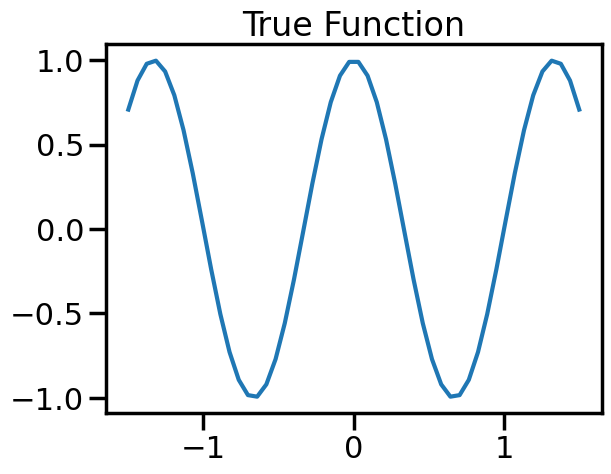

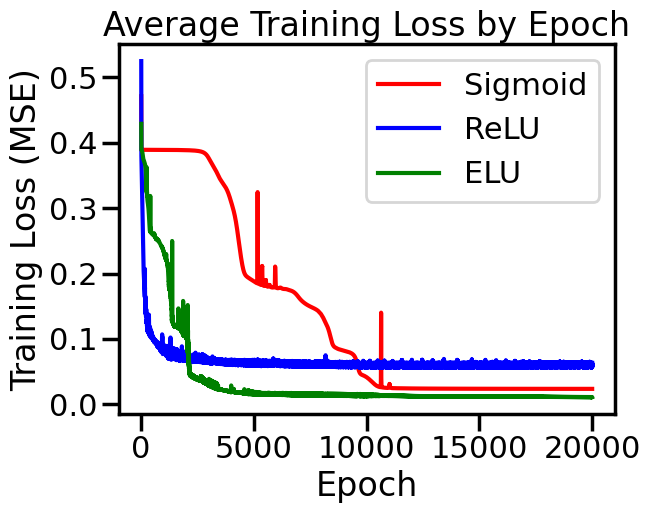

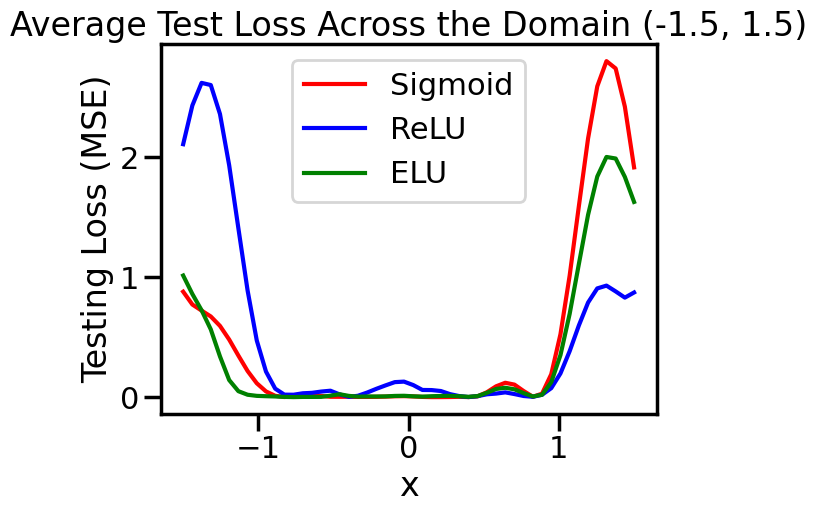

In [26]:
#plots for questions 1-3
#actual function output
plt.figure()
plt.plot(xTrue,yTrue)
plt.title("True Function")

#training loss across eophcs by activaiton function
plt.figure()
plt.plot(range(1,nE+1), q1TrainLoss, 'r-', range(1,nE+1), q2TrainLoss, 'b-', range(1,nE+1), q3TrainLoss, 'g-')
plt.legend(["Sigmoid", "ReLU", "ELU"])
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Average Training Loss by Epoch")

#testing loss across epochs by actiaiton function
plt.figure()
plt.plot(xTrue, q1TestLoss, 'r-', xTrue, q2TestLoss, 'b-', xTrue, q3TestLoss, 'g-')
plt.legend(["Sigmoid", "ReLU", "ELU"])
plt.xlabel("x")
plt.ylabel("Testing Loss (MSE)")
plt.title("Average Test Loss Across the Domain (-1.5, 1.5)")

#print train/test MSEs
#final Training loss b/c averaging across epochs doens tmake sense, average test loss across whole domain
print(" Model 1 (Sigmoid activator) has final Training Loss " + str(np.round(q1TrainLoss[-1],4)) + " and average Test Loss " + str(np.round(np.average(q1TestLoss),4)))
print(" Model 2 (ReLU activator) has final Training Loss " + str(np.round(q2TrainLoss[-1],4)) + " and average Test Loss " + str(np.round(np.average(q2TestLoss),4)))
print(" Model 3 (ELU activator) has final Training Loss " + str(np.round(q3TrainLoss[-1],4)) + " and average Test Loss " + str(np.round(np.average(q3TestLoss),4)))

We can see that out of all the model sigmoid actiated ones preform the wrost on average. ELU (exponential linear unit) models preform best while ReLU (rectified linear unit) models fall somewhere in the middle. We can see that when we calculate test MSE across the function domain we get roughly what we'd expect; the more highly sampled interior shows smaller error while the more sparsely sampled exterior regions show higher error. If we were to continue this model we'd likely see the error continuing to grow in both directions.

Text(0, 0.5, 'MSE')

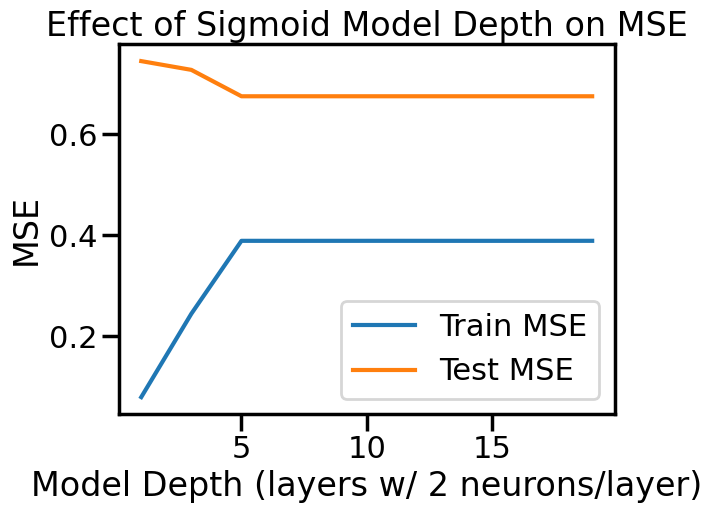

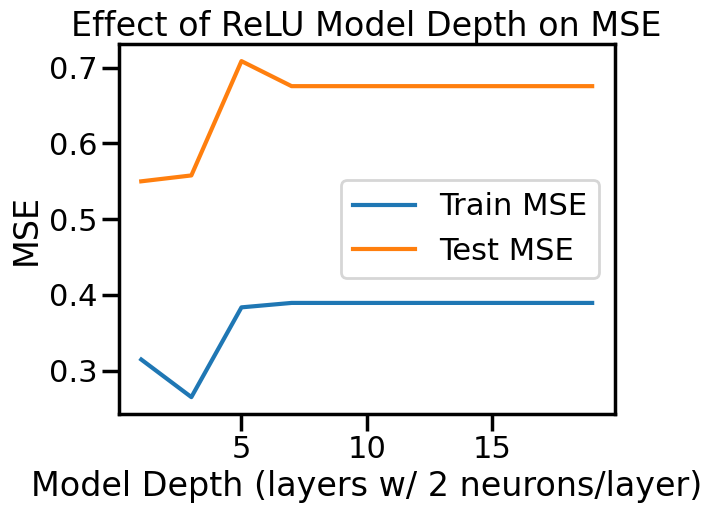

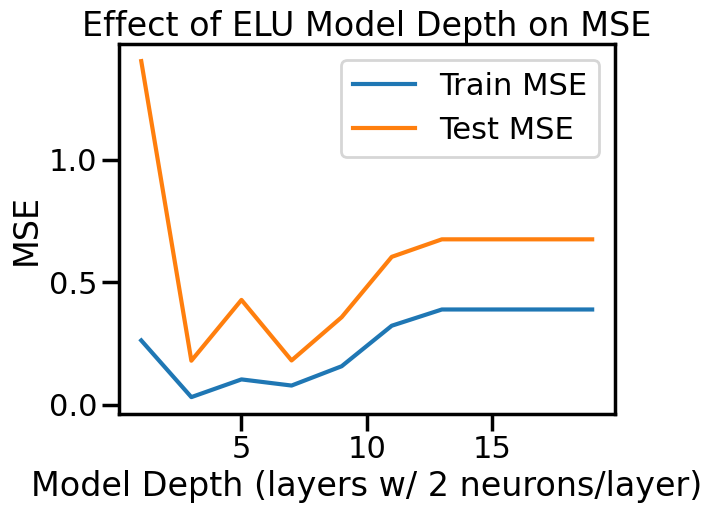

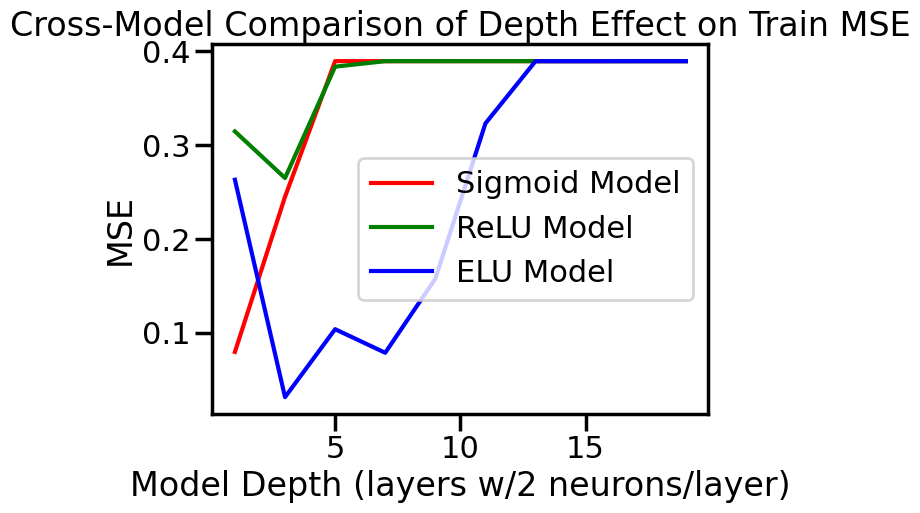

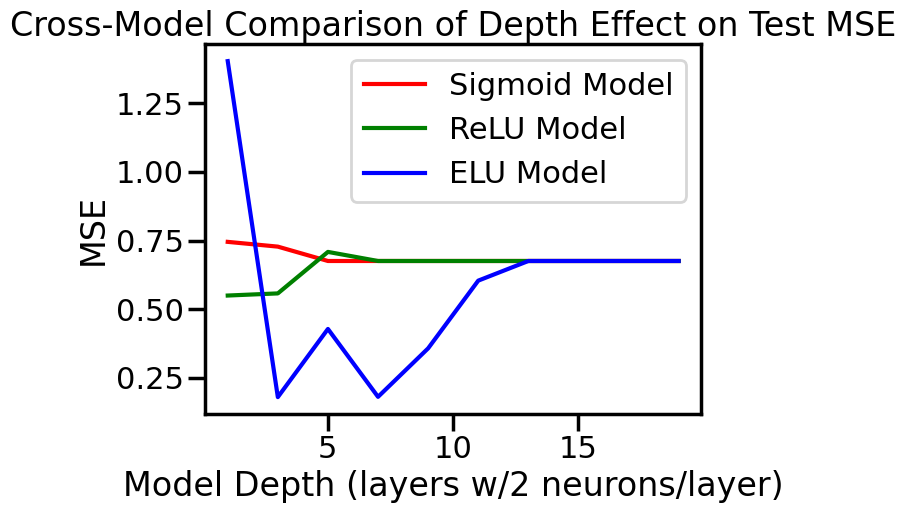

In [27]:
#plot outputs for question 4
#Train?Test MSE for model 1     
plt.figure()
plt.plot(stepDepth,q4TrainMSE1)
plt.plot(stepDepth,q4TestMSE1)
plt.legend(["Train MSE", "Test MSE"])
plt.title("Effect of Sigmoid Model Depth on MSE")
plt.xlabel("Model Depth (layers w/ 2 neurons/layer)")
plt.ylabel("MSE")

#Train/Test MSE for model 2
plt.figure()
plt.plot(stepDepth,q4TrainMSE2)
plt.plot(stepDepth,q4TestMSE2)
plt.legend(["Train MSE", "Test MSE"])
plt.title("Effect of ReLU Model Depth on MSE")
plt.xlabel("Model Depth (layers w/ 2 neurons/layer)")
plt.ylabel("MSE")

#Train/Test MSE for model 3
plt.figure()
plt.plot(stepDepth,q4TrainMSE3)
plt.plot(stepDepth,q4TestMSE3)
plt.legend(["Train MSE", "Test MSE"])
plt.title("Effect of ELU Model Depth on MSE")
plt.xlabel("Model Depth (layers w/ 2 neurons/layer)")
plt.ylabel("MSE")

#Training MSE across models
plt.figure()
plt.plot(stepDepth, q4TrainMSE1, 'r-', stepDepth, q4TrainMSE2, 'g-', stepDepth, q4TrainMSE3, 'b-')
plt.legend(["Sigmoid Model", "ReLU Model", "ELU Model"])
plt.title("Cross-Model Comparison of Depth Effect on Train MSE")
plt.xlabel("Model Depth (layers w/2 neurons/layer)")
plt.ylabel("MSE")

#Test MSE across models
plt.figure()
plt.plot(stepDepth, q4TestMSE1, 'r-', stepDepth, q4TestMSE2, 'g-', stepDepth, q4TestMSE3, 'b-')
plt.legend(["Sigmoid Model", "ReLU Model", "ELU Model"])
plt.title("Cross-Model Comparison of Depth Effect on Test MSE")
plt.xlabel("Model Depth (layers w/2 neurons/layer)")
plt.ylabel("MSE")

Q: How is each model affected as you increase the depth of the network?

What sticks out to me here is tradeoffs - increaing model depth gives better preformance at the cost of requiring longer training times. For a fixed training time like we have this translates to diminishing returns as we increase model depth. Largely down to it being the best preforming class of model, this is most apparent with ELU activated models that have a signifigant dip in both test and train MSE between 3 and 7 layers with the MSE beginning to grow once you go deeper than 7 layers.

Q: Are there any differences between your choice of activation function and the training or testing MSE?

Yes. In order of decreasing preformance it's sigmoid, ReLU, ELU. Moreover the models MSE curves settle in the same order.

Q: If there are any differences, why do you think there could be a difference?

Sigmoid activation funcitons map inputs to the range (0,1), ReLU form (0,infty) and ELU from (-c, infty) with c being a chosen constant. The wider the space the activator is able to map inputs onto the more information is preserved through the mapping (or rather, the information is preserved more accurately) which leads to better results. The largest improvment comes from allowing ourselves to map inputs to negative numbers, which only the ELU unit is capable of. I'm not sure of the exact mathemtaical reason, but in many ML applications being able to map layer outputs to negative values vastly improves the model's ability to converge on the true answer.